In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("kendall_corr.csv")
df_month

,May_5,December,May_7,May,April_2,November_3,March_2,May_2,June_4,May_6,...,December_4,July_3,December_2,July,January_8,December_3,March_4,February_4,August_2,September
0,0.313200,-0.346315,0.710976,0.359581,0.084560,-0.596723,-0.522800,-0.593572,0.199451,0.578430,...,-0.453753,0.686176,0.223988,-0.181559,-0.057003,0.002584,-0.078047,-0.251280,0.035055,-0.105764
1,0.356062,-0.346315,0.826522,0.444494,0.053162,-0.596723,-0.360933,-0.499775,0.199451,0.941395,...,-0.453753,0.686176,0.223988,-0.181559,-0.184855,0.002584,-0.049422,-0.455797,0.035055,-0.105764
2,0.599995,-0.433923,0.541607,0.006345,-0.243489,-0.485163,-0.236472,-0.584653,0.097497,0.840295,...,-0.441731,0.736187,0.002953,-0.341600,-0.131970,0.595177,-0.120937,-0.301666,0.120072,-0.154054
3,0.282180,-0.696828,0.865502,0.338369,-0.006795,-0.563371,-0.228254,-0.565161,0.259793,0.522676,...,-0.547069,1.035612,-0.049262,-0.178372,-0.372445,0.440662,-0.032259,-0.317349,-0.124300,-0.013321
4,0.434114,-0.613563,0.557727,0.010838,-0.215218,-0.308393,-0.237256,-0.410993,0.167312,-0.025233,...,-0.896460,0.647763,-0.020633,-0.276263,-0.325277,0.076238,0.098653,-0.412448,-0.110017,0.185676
5,0.496766,-0.582546,0.673865,0.328808,-0.125061,-0.545654,-0.214241,-0.668774,0.663080,0.565462,...,-0.692635,0.294249,-0.065803,-0.125920,-0.168640,0.151511,-0.080749,-0.251416,0.005020,-0.101145
6,0.479629,-0.629193,0.327384,0.541366,0.224730,0.071710,-0.044161,-0.445503,0.410829,0.048445,...,-0.733731,0.295762,-0.046479,-0.194026,0.291577,0.606251,-0.027726,-0.305620,-0.304511,-0.045063
7,0.324634,-0.197325,0.724865,0.268308,-0.037644,-0.275878,-0.516501,-0.457219,0.582119,0.603642,...,-0.405538,0.013378,-0.120470,-0.192533,0.202162,0.298939,0.299648,-0.083966,0.140915,0.291776
8,0.401587,-0.343663,0.655690,0.132932,-0.157339,-0.124376,-0.114679,-0.394667,0.097035,0.419486,...,-0.584019,0.322444,-0.236354,-0.368761,0.278289,0.598003,-0.273505,-0.166784,-0.043944,-0.028213
9,0.573596,-0.467842,0.711807,0.370820,-0.107566,-0.125701,-0.479743,-0.481131,0.097207,0.164209,...,-0.381934,0.415162,-0.169212,-0.398708,0.132679,0.633548,-0.183770,-0.051378,0.027228,-0.048776


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :10]
x_train = scaler.fit_transform(x_train)
x_train

array([[-5.79647404e-01,  8.70065530e-01,  5.83981349e-01,
         8.87015495e-01,  6.81641991e-01, -4.75959269e-01,
        -6.44124823e-01, -7.26425378e-01,  3.75080472e-01,
         2.36555413e-01],
       [-3.81405603e-01,  8.70065530e-01,  1.11778529e+00,
         1.33077281e+00,  5.11376255e-01, -4.75959269e-01,
         1.71042109e-02, -1.91789077e-01,  3.75080472e-01,
         1.57288435e+00],
       [ 7.46835017e-01,  4.41207972e-01, -1.98474592e-01,
        -9.59004921e-01, -1.09729345e+00, -8.91444447e-02,
         5.25528346e-01, -6.75585833e-01, -1.09732645e-01,
         1.20066147e+00],
       [-7.23125050e-01, -8.45756411e-01,  1.29786609e+00,
         7.76157542e-01,  1.86245778e-01, -3.60318579e-01,
         5.59100915e-01, -5.64485264e-01,  6.62019573e-01,
         3.12829913e-02],
       [-2.03974384e-02, -4.38159229e-01, -1.24000383e-01,
        -9.35529454e-01, -9.43983494e-01,  5.23770684e-01,
         5.22326510e-01,  3.14258320e-01,  2.22254428e-01,
        -1.

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [8]:
x_test = df_month.iloc[43:, :10]
x_test = scaler.fit_transform(x_test)
x_test

array([[ 0.32086694, -0.85435037, -0.12167892, -0.30401138, -0.51707718,
         2.00232052,  0.28095709,  1.39862572, -0.10002055, -1.92817251],
       [ 0.0923005 , -0.13144464,  1.5878626 ,  0.86430999, -1.0850996 ,
        -1.1928054 , -1.93214909, -0.3075412 ,  1.12079638, -0.3487276 ],
       [-0.19414759, -0.59433235, -1.76198836,  0.73752794, -0.09160704,
        -1.17877464,  0.4448952 ,  0.5810525 , -0.65212718, -0.59995164],
       [-0.61772835,  1.42066386, -0.3850921 , -0.32621988,  0.59203959,
        -0.6678713 , -1.14399541,  1.22601854, -0.70351564,  0.40078695],
       [-1.51483587, -0.61339274, -0.07537512, -0.1378226 , -0.88581601,
         0.48038534, -0.5773976 , -0.27797307,  0.03292523,  0.99095691],
       [-0.43361694,  1.55115553, -1.24510708, -0.33856368,  1.46521916,
        -0.33153674, -0.24342098,  0.84392136,  0.24339749,  1.16765992],
       [ 0.19618846, -2.02042174,  0.97721197, -1.05795106, -0.28322009,
         1.18174685,  1.87067633,  0.17288611

In [9]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [10]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 6}
Best Score: 0.4812715156612634
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 39}
Best Score: 0.36517846318290426
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 7}
Best Score: 0.3355797054249246
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 14}
Best Score: 0.41078722608148766
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 4}
Best Score: 0.38087653595340015


In [13]:
y_pred_list

[array([-0.27741089,  0.31002072, -0.27741089,  0.42519707,  0.21160806,
         0.11892982, -0.27741089, -0.31701741,  0.31739753, -0.46055456,
        -0.13319676, -0.27741089, -0.16961327,  0.06698953,  0.42519707,
         0.21160806]),
 array([-0.05854054,  0.04805111, -0.10671111,  0.2229191 ,  0.23670059,
        -0.35031968, -0.11012885, -0.43166344,  0.12986167, -0.48398016,
        -0.63161046, -0.05854054, -0.18065437,  0.11470769,  0.28568402,
         0.21918777]),
 array([-0.20214405,  0.03226793, -0.21937909,  0.37614827,  0.20612971,
         0.22530182, -0.28644021, -0.36057682, -0.10676115, -0.32718357,
        -0.12513179, -0.13877103, -0.21937909,  0.34130398,  0.37716868,
         0.20612971]),
 array([-0.1502624 ,  0.61301198, -0.28775674,  0.20528268,  0.04856829,
         0.17942478, -0.28463288, -0.26581989,  0.46851143, -0.44571605,
        -0.20451132, -0.09284091, -0.3784115 ,  0.22751311,  0.52819793,
        -0.07514514]),
 array([-0.68528571,  1.695     

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.7281910659455696,
 0.7168298855631633,
 0.5165341564332581,
 0.7949872237967612,
 0.6127693530052996]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/10 predictors/kendall/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Air_Temperature (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/10 predictors/kendall/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/10 predictors/kendall/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'Air_Temperature Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/10 predictors/kendall/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 6}
Best Score: 0.4812715156612634
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 39}
Best Score: 0.36517846318290426
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 7}
Best Score: 0.3355797054249246
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 14}
Best Score: 0.41078722608148766
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 4}
Best Score: 0.38087653595340015


In [21]:
y_pred_list_rf

[array([-0.27741089,  0.31002072, -0.27741089,  0.42519707,  0.21160806,
         0.11892982, -0.27741089, -0.31701741,  0.31739753, -0.46055456,
        -0.13319676, -0.27741089, -0.16961327,  0.06698953,  0.42519707,
         0.21160806]),
 array([-0.05854054,  0.04805111, -0.10671111,  0.2229191 ,  0.23670059,
        -0.35031968, -0.11012885, -0.43166344,  0.12986167, -0.48398016,
        -0.63161046, -0.05854054, -0.18065437,  0.11470769,  0.28568402,
         0.21918777]),
 array([-0.20214405,  0.03226793, -0.21937909,  0.37614827,  0.20612971,
         0.22530182, -0.28644021, -0.36057682, -0.10676115, -0.32718357,
        -0.12513179, -0.13877103, -0.21937909,  0.34130398,  0.37716868,
         0.20612971]),
 array([-0.1502624 ,  0.61301198, -0.28775674,  0.20528268,  0.04856829,
         0.17942478, -0.28463288, -0.26581989,  0.46851143, -0.44571605,
        -0.20451132, -0.09284091, -0.3784115 ,  0.22751311,  0.52819793,
        -0.07514514]),
 array([-0.68528571,  1.695     

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.7281910659455696,
 0.7168298855631633,
 0.5165341564332581,
 0.7949872237967612,
 0.6127693530052996]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/10 predictors/kendall/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Air_Temperature (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook
    
print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/10 predictors/kendall/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/10 predictors/kendall/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'Air_Temperature Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Air_Temperature/10 predictors/kendall/comparison plots/randomforest


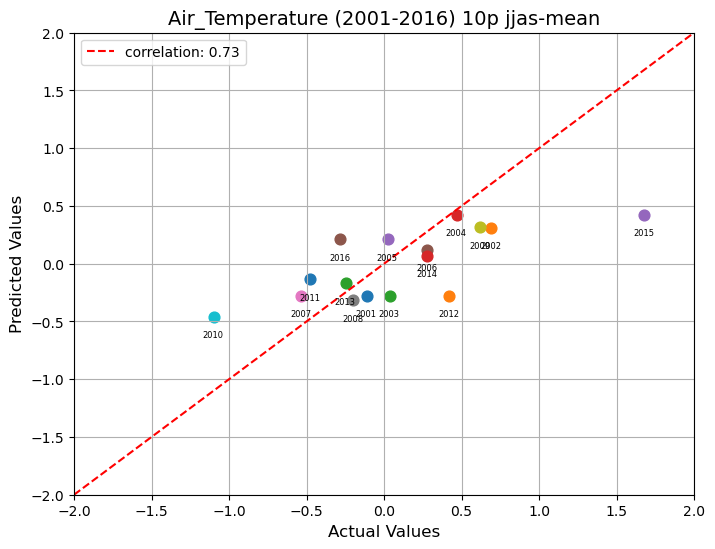

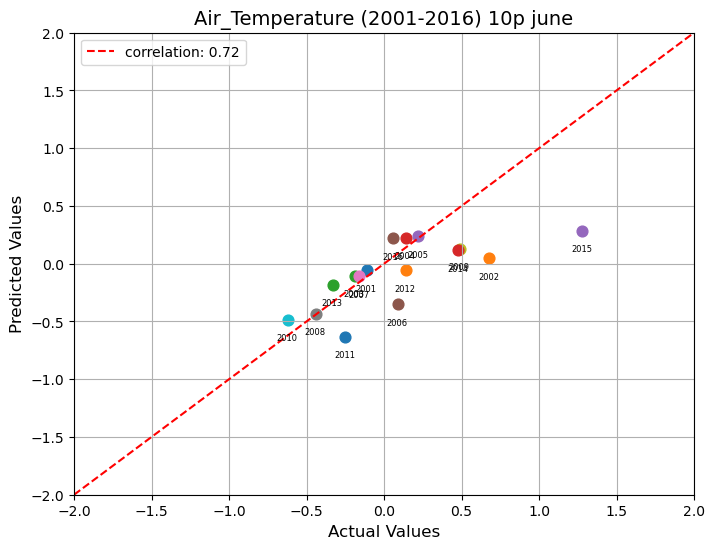

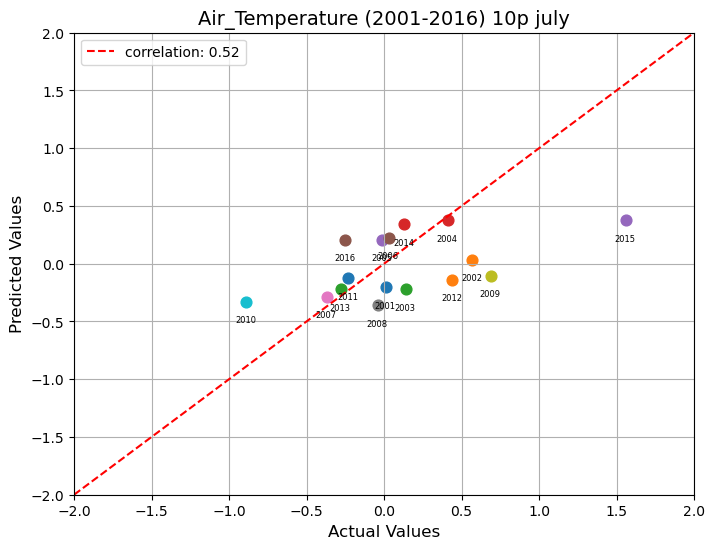

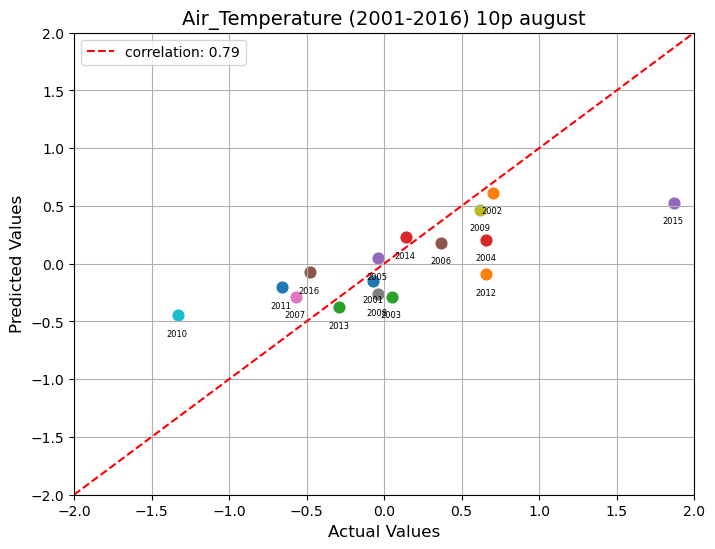

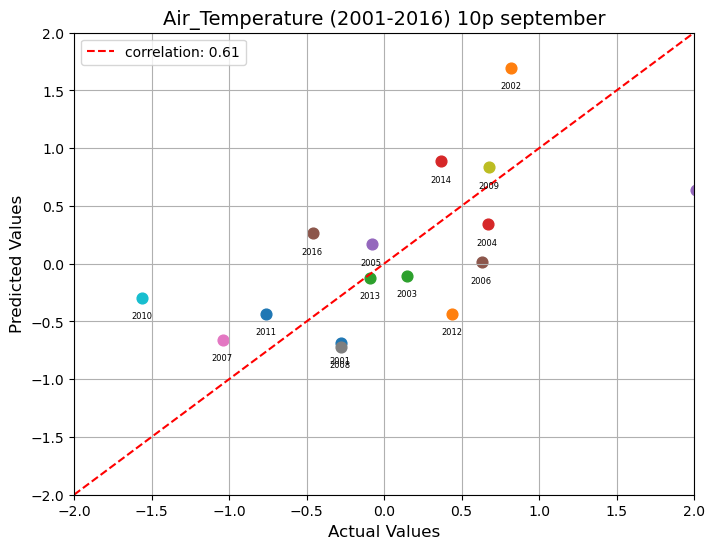

In [29]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=60)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Air_Temperature (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show